Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and
interpret the results.

In [1]:
import numpy as np
import scipy.stats as stats

def z_test(sample, population_mean, population_std, alpha=0.05, tail="two"):
    """
    Performs a Z-test for comparing a sample mean to a known population mean.

    Parameters:
    - sample: list or numpy array of sample data
    - population_mean: known population mean
    - population_std: known population standard deviation
    - alpha: significance level (default is 0.05)
    - tail: "two" for two-tailed test, "left" for left-tailed, "right" for right-tailed

    Returns:
    - Z-score, p-value, and interpretation of results
    """

    # Sample statistics
    sample_mean = np.mean(sample)
    sample_size = len(sample)

    # Compute Z-score
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

    # Compute p-value based on tail type
    if tail == "two":
        p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test
    elif tail == "left":
        p_value = stats.norm.cdf(z_score)  # Left-tailed test
    elif tail == "right":
        p_value = 1 - stats.norm.cdf(z_score)  # Right-tailed test
    else:
        raise ValueError("Invalid tail type. Use 'two', 'left', or 'right'.")

    # Interpretation
    print(f"Z-score: {z_score:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Reject the null hypothesis (H0).")
    else:
        print("Fail to reject the null hypothesis (H0).")

# Example Usage
sample_data = [102, 98, 100, 105, 97, 101, 99, 103, 104, 96]  # Sample data
population_mean = 100  # Known population mean
population_std = 5  # Known population standard deviation
alpha = 0.05  # Significance level
tail = "two"  # Two-tailed test

z_test(sample_data, population_mean, population_std, alpha, tail)


Z-score: 0.3162
P-value: 0.7518
Fail to reject the null hypothesis (H0).


Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python


In [2]:
import numpy as np
import scipy.stats as stats

def hypothesis_test(sample_size=30, population_mean=100, population_std=15, alpha=0.05, tail="two", test_type="z"):
    """
    Simulates random data and performs a hypothesis test (Z-test or T-test).

    Parameters:
    - sample_size: Number of random samples (default=30)
    - population_mean: Known population mean
    - population_std: Known population standard deviation (used in Z-test)
    - alpha: Significance level (default=0.05)
    - tail: "two" for two-tailed test, "left" for left-tailed, "right" for right-tailed
    - test_type: "z" for Z-test (known population std), "t" for T-test (unknown population std)

    Returns:
    - Test statistic, p-value, and interpretation
    """

    # Generate random sample data
    np.random.seed(42)  # For reproducibility
    sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

    # Sample statistics
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation

    # Perform the hypothesis test
    if test_type == "z":
        # Z-test: Population standard deviation is known
        test_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
        p_value = 2 * (1 - stats.norm.cdf(abs(test_statistic))) if tail == "two" else (
            stats.norm.cdf(test_statistic) if tail == "left" else 1 - stats.norm.cdf(test_statistic)
        )
    elif test_type == "t":
        # T-test: Population standard deviation is unknown
        test_statistic, p_value = stats.ttest_1samp(sample, population_mean)
        if tail == "left":
            p_value /= 2 if test_statistic < 0 else 1 - (p_value / 2)
        elif tail == "right":
            p_value /= 2 if test_statistic > 0 else 1 - (p_value / 2)

    # Display results
    print(f"Test Statistic ({test_type}-test): {test_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Reject the null hypothesis (H0). Significant difference found.")
    else:
        print("Fail to reject the null hypothesis (H0). No significant difference.")

# Example Usage
hypothesis_test(sample_size=30, population_mean=100, population_std=15, alpha=0.05, tail="two", test_type="z")


Test Statistic (z-test): -1.0305
P-value: 0.3028
Fail to reject the null hypothesis (H0). No significant difference.


Implement a one-sample Z-test using Python to compare the sample mean with the population mean

In [3]:
import numpy as np
import scipy.stats as stats

def one_sample_z_test(sample, population_mean, population_std, alpha=0.05, tail="two"):
    """
    Performs a one-sample Z-test to compare the sample mean with the population mean.

    Parameters:
    - sample: list or numpy array of sample data
    - population_mean: known population mean
    - population_std: known population standard deviation
    - alpha: significance level (default is 0.05)
    - tail: "two" for two-tailed test, "left" for left-tailed, "right" for right-tailed

    Returns:
    - Z-score, p-value, and hypothesis test result
    """

    # Sample statistics
    sample_mean = np.mean(sample)
    sample_size = len(sample)

    # Compute Z-score
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

    # Compute p-value based on tail type
    if tail == "two":
        p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test
    elif tail == "left":
        p_value = stats.norm.cdf(z_score)  # Left-tailed test
    elif tail == "right":
        p_value = 1 - stats.norm.cdf(z_score)  # Right-tailed test
    else:
        raise ValueError("Invalid tail type. Use 'two', 'left', or 'right'.")

    # Interpretation
    print(f"Z-score: {z_score:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Reject the null hypothesis (H0). The sample mean is significantly different from the population mean.")
    else:
        print("Fail to reject the null hypothesis (H0). No significant difference between the sample and population mean.")

# Example Usage
sample_data = np.random.normal(loc=102, scale=5, size=30)  # Simulated sample data
population_mean = 100  # Known population mean
population_std = 5  # Known population standard deviation
alpha = 0.05  # Significance level
tail = "two"  # Two-tailed test

one_sample_z_test(sample_data, population_mean, population_std, alpha, tail)


Z-score: 1.5273
P-value: 0.1267
Fail to reject the null hypothesis (H0). No significant difference between the sample and population mean.


Perform a two-tailed Z-test using Python and visualize the decision region on a plot


Z-score: 1.1604
P-value: 0.2459
Critical values: [-1.959963984540054, 1.959963984540054]
Fail to reject the null hypothesis (H0). No significant difference.


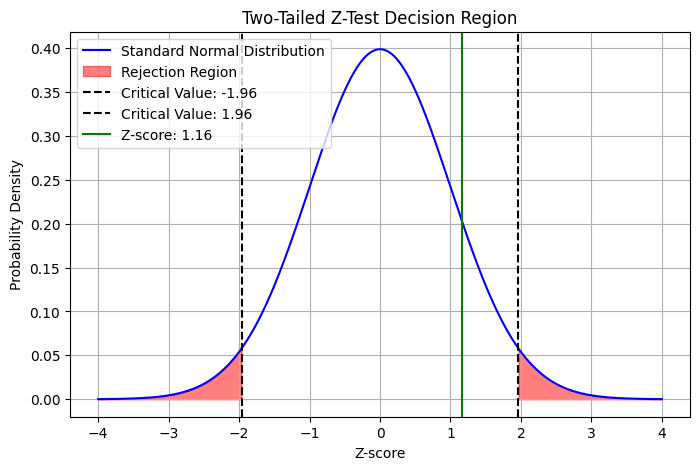

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def two_tailed_z_test(sample, population_mean, population_std, alpha=0.05):
    """
    Performs a two-tailed Z-test and visualizes the decision region.

    Parameters:
    - sample: list or numpy array of sample data
    - population_mean: known population mean
    - population_std: known population standard deviation
    - alpha: significance level (default is 0.05)

    Returns:
    - Z-score, p-value, and a visualization of the decision regions
    """

    # Sample statistics
    sample_mean = np.mean(sample)
    sample_size = len(sample)

    # Compute Z-score
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

    # Compute p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    # Critical values for two-tailed test
    z_critical = stats.norm.ppf(1 - alpha/2)  # Z-score corresponding to α/2
    rejection_region = [-z_critical, z_critical]

    # Print results
    print(f"Z-score: {z_score:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Critical values: {rejection_region}")

    if abs(z_score) > z_critical:
        print("Reject the null hypothesis (H0). Significant difference found.")
    else:
        print("Fail to reject the null hypothesis (H0). No significant difference.")

    # Visualization
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x, 0, 1)  # Standard normal distribution

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="Standard Normal Distribution", color='blue')

    # Fill rejection regions
    plt.fill_between(x, y, where=(x < -z_critical), color='red', alpha=0.5, label="Rejection Region")
    plt.fill_between(x, y, where=(x > z_critical), color='red', alpha=0.5)

    # Mark critical values
    plt.axvline(-z_critical, linestyle="--", color="black", label=f"Critical Value: {-z_critical:.2f}")
    plt.axvline(z_critical, linestyle="--", color="black", label=f"Critical Value: {z_critical:.2f}")

    # Mark Z-score
    plt.axvline(z_score, linestyle="-", color="green", label=f"Z-score: {z_score:.2f}")

    plt.title("Two-Tailed Z-Test Decision Region")
    plt.xlabel("Z-score")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=102, scale=5, size=30)  # Simulated sample data
population_mean = 100  # Known population mean
population_std = 5  # Known population standard deviation
alpha = 0.05  # Significance level

two_tailed_z_test(sample_data, population_mean, population_std, alpha)


Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing

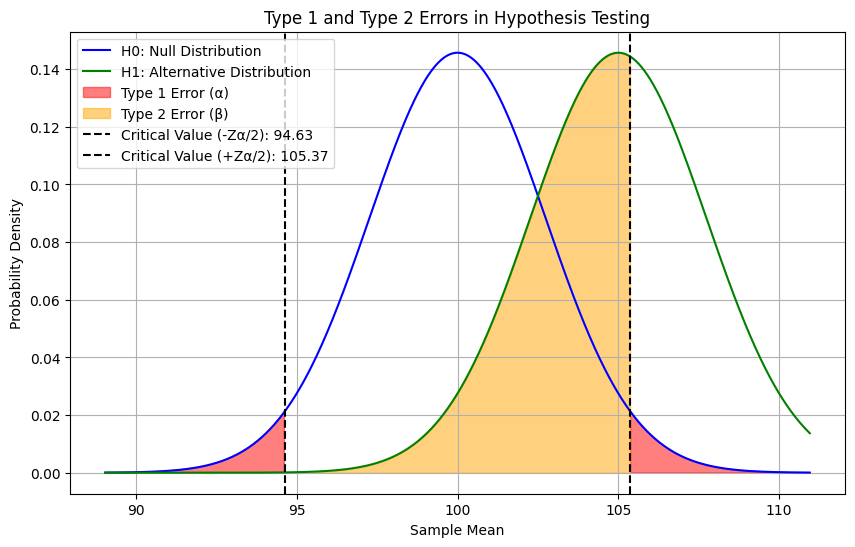

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def visualize_type1_type2_errors(pop_mean, pop_std, sample_size, true_mean, alpha=0.05):
    """
    Calculates and visualizes Type 1 and Type 2 errors in hypothesis testing.

    Parameters:
    - pop_mean: Population mean under null hypothesis (H0)
    - pop_std: Population standard deviation
    - sample_size: Size of the sample
    - true_mean: Actual mean under alternative hypothesis (H1)
    - alpha: Significance level (default 0.05)

    Returns:
    - Plots the probability distributions and highlights Type 1 and Type 2 errors.
    """

    # Compute standard error
    std_error = pop_std / np.sqrt(sample_size)

    # Critical value (two-tailed test)
    z_critical = stats.norm.ppf(1 - alpha / 2)
    critical_value_low = pop_mean - z_critical * std_error
    critical_value_high = pop_mean + z_critical * std_error

    # Define x values for plotting
    x = np.linspace(pop_mean - 4*std_error, pop_mean + 4*std_error, 1000)

    # Null hypothesis (H0) distribution
    h0_dist = stats.norm.pdf(x, pop_mean, std_error)

    # Alternative hypothesis (H1) distribution
    h1_dist = stats.norm.pdf(x, true_mean, std_error)

    # Plot H0 and H1 distributions
    plt.figure(figsize=(10, 6))
    plt.plot(x, h0_dist, label="H0: Null Distribution", color="blue")
    plt.plot(x, h1_dist, label="H1: Alternative Distribution", color="green")

    # Shade Type 1 Error Region (Alpha)
    plt.fill_between(x, h0_dist, where=(x < critical_value_low) | (x > critical_value_high), color="red", alpha=0.5, label="Type 1 Error (α)")

    # Shade Type 2 Error Region (Beta)
    beta_region = (x > critical_value_low) & (x < critical_value_high)
    plt.fill_between(x, h1_dist, where=beta_region, color="orange", alpha=0.5, label="Type 2 Error (β)")

    # Critical value lines
    plt.axvline(critical_value_low, color="black", linestyle="--", label=f"Critical Value (-Zα/2): {critical_value_low:.2f}")
    plt.axvline(critical_value_high, color="black", linestyle="--", label=f"Critical Value (+Zα/2): {critical_value_high:.2f}")

    # Labels and legend
    plt.xlabel("Sample Mean")
    plt.ylabel("Probability Density")
    plt.title("Type 1 and Type 2 Errors in Hypothesis Testing")
    plt.legend()
    plt.grid()

    plt.show()

# Example Usage
visualize_type1_type2_errors(pop_mean=100, pop_std=15, sample_size=30, true_mean=105, alpha=0.05)


Write a Python program to perform an independent T-test and interpret the results

In [6]:
import numpy as np
import scipy.stats as stats

def independent_t_test(sample1, sample2, alpha=0.05, equal_var=True):
    """
    Performs an independent (two-sample) T-test.

    Parameters:
    - sample1: First sample data (list or numpy array)
    - sample2: Second sample data (list or numpy array)
    - alpha: Significance level (default 0.05)
    - equal_var: Assume equal variance (default True for Student’s T-test, False for Welch’s T-test)

    Returns:
    - T-statistic, p-value, and hypothesis test result
    """

    # Perform T-test
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=equal_var)

    # Print results
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Reject the null hypothesis (H0). The two sample means are significantly different.")
    else:
        print("Fail to reject the null hypothesis (H0). No significant difference between the sample means.")

# Example Usage
np.random.seed(42)  # For reproducibility
sample1 = np.random.normal(loc=100, scale=10, size=30)  # Sample group 1
sample2 = np.random.normal(loc=105, scale=10, size=30)  # Sample group 2

independent_t_test(sample1, sample2, alpha=0.05, equal_var=True)


T-statistic: -2.3981
P-value: 0.0197
Reject the null hypothesis (H0). The two sample means are significantly different.


Perform a paired sample T-test using Python and visualize the comparison results

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def paired_t_test(before, after, alpha=0.05):
    """
    Performs a paired (dependent) T-test and visualizes the results.

    Parameters:
    - before: First set of measurements (before treatment)
    - after: Second set of measurements (after treatment)
    - alpha: Significance level (default 0.05)

    Returns:
    - T-statistic, p-value, and a visualization of mean differences.
    """

    # Compute differences
    differences = np.array(after) - np.array(before)

    # Perform Paired T-test
    t_stat, p_value = stats.ttest_rel(before, after)

    # Print results
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Reject the null hypothesis (H0). The means are significantly different.")
    else:
        print("Fail to reject the null hypothesis (H0). No significant difference between the means.")

    # Visualization
    plt.figure(figsize=(8, 5))

    # Boxplot for comparison
    plt.boxplot([before, after], labels=['Before', 'After'], patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title("Paired Sample Comparison")
    plt.ylabel("Values")
    plt.grid(True)

    # Connecting individual data points
    for i in range(len(before)):
        plt.plot([1, 2], [before[i], after[i]], 'r--', alpha=0.6)

    plt.show()

# Example Usage
np.random.seed(42)  # For reproducibility
before_scores =


SyntaxError: invalid syntax (<ipython-input-7-f927a00ce7bd>, line 50)

Simulate data and perform both Z-test and T-test, then compare the results using Python

In [8]:
import numpy as np
import scipy.stats as stats

def perform_tests(pop_mean, pop_std, sample_size, alpha=0.05):
    """
    Simulates data and performs both Z-test and T-test, then compares results.

    Parameters:
    - pop_mean: Known population mean
    - pop_std: Known population standard deviation
    - sample_size: Size of the random sample
    - alpha: Significance level (default 0.05)

    Returns:
    - Z-test and T-test results with interpretation.
    """

    # Generate random sample
    np.random.seed(42)
    sample = np.random.normal(loc=pop_mean + 2, scale=pop_std, size=sample_size)  # Slightly shifted mean for testing
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation (unbiased)

    print(f"Sample Mean: {sample_mean:.4f}")
    print(f"Sample Standard Deviation: {sample_std:.4f}")

    # **Z-Test (When Population Standard Deviation is Known)**
    z_stat = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))
    p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed test

    print("\nZ-Test Results:")
    print(f"Z-Statistic: {z_stat:.4f}")
    print(f"P-Value: {p_value_z:.4f}")

    if p_value_z < alpha:
        print("Reject the null hypothesis (H0). Sample mean is significantly different.")
    else:
        print("Fail to reject the null hypothesis (H0). No significant difference.")

    # **T-Test (When Population Standard Deviation is Unknown)**
    t_stat, p_value_t = stats.ttest_1samp(sample, pop_mean)  # One-sample t-test

    print("\nT-Test Results:")
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_value_t:.4f}")

    if p_value_t < alpha:
        print("Reject the null hypothesis (H0). Sample mean is significantly different.")
    else:
        print("Fail to reject the null hypothesis (H0). No significant difference.")

# Example Usage
perform_tests(pop_mean=100, pop_std=15, sample_size=25, alpha=0.05)


Sample Mean: 99.5474
Sample Standard Deviation: 14.3483

Z-Test Results:
Z-Statistic: -0.1509
P-Value: 0.8801
Fail to reject the null hypothesis (H0). No significant difference.

T-Test Results:
T-Statistic: -0.1577
P-Value: 0.8760
Fail to reject the null hypothesis (H0). No significant difference.


Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

In [9]:
import numpy as np
import scipy.stats as stats

def confidence_interval(sample, confidence=0.95):
    """
    Calculates the confidence interval for a sample mean.

    Parameters:
    - sample: List or NumPy array of sample data
    - confidence: Confidence level (default = 95%)

    Returns:
    - (Lower bound, Upper bound) of the confidence interval
    """

    n = len(sample)  # Sample size
    sample_mean = np.mean(sample)  # Mean of sample
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation (unbiased)

    # Select the critical value: Z-score for large samples, T-score for small samples
    if n > 30:
        critical_value = stats.norm.ppf(1 - (1 - confidence) / 2)  # Z-score
    else:
        critical_value = stats.t.ppf(1 - (1 - confidence) / 2, df=n-1)  # T-score

    # Calculate margin of error
    margin_of_error = critical_value * (sample_std / np.sqrt(n))

    # Compute Confidence Interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    print(f"Sample Mean: {sample_mean:.4f}")
    print(f"Confidence Interval ({confidence * 100}%): [{lower_bound:.4f}, {upper_bound:.4f}]")

    return (lower_bound, upper_bound)

# Example Usage
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=100, scale=15, size=25)  # Sample from normal distribution

confidence_interval(sample_data, confidence=0.95)


Sample Mean: 97.5474
Confidence Interval (95.0%): [91.6247, 103.4701]


(91.6246937014882, 103.47006453876905)

Write a Python program to calculate the margin of error for a given confidence level using sample data

In [10]:
import numpy as np
import scipy.stats as stats

def margin_of_error(sample, confidence=0.95):
    """
    Calculates the margin of error for a given confidence level using sample data.

    Parameters:
    - sample: List or NumPy array of sample data
    - confidence: Confidence level (default = 95%)

    Returns:
    - Margin of error (MOE)
    """

    n = len(sample)  # Sample size
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation (unbiased)

    # Determine critical value: Z-score for large samples, T-score for small samples
    if n > 30:
        critical_value = stats.norm.ppf(1 - (1 - confidence) / 2)  # Z-score
    else:
        critical_value = stats.t.ppf(1 - (1 - confidence) / 2, df=n-1)  # T-score

    # Calculate Margin of Error
    moe = critical_value * (sample_std / np.sqrt(n))

    print(f"Sample Standard Deviation: {sample_std:.4f}")
    print(f"Margin of Error ({confidence * 100}% Confidence Level): ±{moe:.4f}")

    return moe

# Example Usage
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=100, scale=15, size=25)  # Sample from normal distribution

margin_of_error(sample_data, confidence=0.95)


Sample Standard Deviation: 14.3483
Margin of Error (95.0% Confidence Level): ±5.9227


5.922685418640429

Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process

In [11]:
def bayes_theorem(prior, likelihood, evidence):
    """
    Computes the posterior probability using Bayes' Theorem.

    Parameters:
    - prior: P(H), Initial belief about hypothesis
    - likelihood: P(E|H), Probability of evidence given hypothesis
    - evidence: P(E), Probability of evidence

    Returns:
    - Posterior probability P(H|E)
    """
    posterior = (likelihood * prior) / evidence
    return posterior

# Example Usage: Bayesian Inference for Disease Diagnosis
# Hypothesis: A person has a rare disease (H)
# Evidence: The person tests positive (E)

prior = 0.01  # P(H) - 1% of people have the disease
likelihood = 0.95  # P(E|H) - 95% accuracy in detecting disease
false_positive = 0.05  # P(E|~H) - 5% false positive rate
p_not_h = 1 - prior  # Probability of NOT having the disease

# Total probability of a positive test (P(E))
evidence = (likelihood * prior) + (false_positive * p_not_h)

# Compute posterior probability P(H|E)
posterior = bayes_theorem(prior, likelihood, evidence)

print(f"Posterior Probability of having the disease given a positive test: {posterior:.4f}")


Posterior Probability of having the disease given a positive test: 0.1610


Perform a Chi-square test for independence between two categorical variables in Python

In [12]:
import numpy as np
import scipy.stats as stats
import pandas as pd

def chi_square_test():
    """
    Performs a Chi-Square test for independence between two categorical variables.
    """

    # Create a contingency table (Example: Gender vs. Preferred Product)
    data = np.array([[30, 10],  # Male
                     [20, 40]]) # Female

    df = pd.DataFrame(data, columns=["Product A", "Product B"], index=["Male", "Female"])

    # Perform Chi-Square Test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(df)

    # Print results
    print("Observed Data:\n", df)
    print("\nExpected Frequencies:\n", pd.DataFrame(expected, columns=df.columns, index=df.index))
    print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-Value: {p_value:.4f}")

    # Interpret result
    alpha = 0.05
    if p_value < alpha:
        print("\nReject the null hypothesis (H0). There is a significant relationship between the variables.")
    else:
        print("\nFail to reject the null hypothesis (H0). No significant relationship found.")

# Run Chi-Square Test
chi_square_test()


Observed Data:
         Product A  Product B
Male           30         10
Female         20         40

Expected Frequencies:
         Product A  Product B
Male         20.0       20.0
Female       30.0       30.0

Chi-Square Statistic: 15.0417
Degrees of Freedom: 1
P-Value: 0.0001

Reject the null hypothesis (H0). There is a significant relationship between the variables.


Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

def calculate_expected_frequencies(observed):
    """
    Calculates expected frequencies for a Chi-Square test based on observed data.

    Parameters:
    - observed: 2D NumPy array or Pandas DataFrame of observed frequencies.

    Returns:
    - Expected frequency table as a Pandas DataFrame.
    """
    observed_array = np.array(observed)

    # Perform Chi-Square test to get expected frequencies
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed_array)

    # Convert to DataFrame for better readability
    expected_df = pd.DataFrame(expected, columns=observed.columns, index=observed.index)

    return expected_df

# Example Observed Data (Gender vs. Preferred Product)
observed_data = pd.DataFrame([[30, 10],  # Males
                              [20, 40]], # Females
                             columns=["Product A", "Product B"],
                             index=["Male", "Female"])

# Calculate Expected Frequencies
expected_frequencies = calculate_expected_frequencies(observed_data)

# Print Results
print("Observed Frequencies:\n", observed_data)
print("\nExpected Frequencies:\n", expected_frequencies)


Observed Frequencies:
         Product A  Product B
Male           30         10
Female         20         40

Expected Frequencies:
         Product A  Product B
Male         20.0       20.0
Female       30.0       30.0


Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution

In [3]:
import numpy as np
import scipy.stats as stats

def goodness_of_fit_test(observed, expected):
    """
    Performs a Chi-Square Goodness-of-Fit test.

    Parameters:
    - observed: List or NumPy array of observed frequencies
    - expected: List or NumPy array of expected frequencies

    Returns:
    - Chi-Square statistic and p-value
    """
    chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

    print(f"Chi-Square Statistic: {chi2_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("\nReject the null hypothesis (H0). The observed data does not fit the expected distribution.")
    else:
        print("\nFail to reject the null hypothesis (H0). The observed data fits the expected distribution.")

# Example: Testing if dice rolls follow a fair distribution
observed_rolls = np.array([15, 12, 14, 10, 16, 13])  # Observed counts for dice faces
expected_rolls = np.array([13.33] * 6)  # Expected counts assuming a fair die (80 rolls / 6 faces)

# Perform the test
goodness_of_fit_test(observed_rolls, expected_rolls)


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.0002500625156288575

Implement an F-test using Python to compare the variances of two random samples

In [4]:
import numpy as np
import scipy.stats as stats

def f_test(sample1, sample2):
    """
    Performs an F-test to compare variances of two samples.

    Parameters:
    - sample1: NumPy array or list (first sample)
    - sample2: NumPy array or list (second sample)

    Returns:
    - F-statistic and p-value
    """
    # Calculate sample variances
    var1 = np.var(sample1, ddof=1)  # Sample variance (unbiased)
    var2 = np.var(sample2, ddof=1)

    # Ensure F-statistic is always >= 1
    if var1 > var2:
        F_stat = var1 / var2
        dfn, dfd = len(sample1) - 1, len(sample2) - 1
    else:
        F_stat = var2 / var1
        dfn, dfd = len(sample2) - 1, len(sample1) - 1

    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - stats.f.cdf(F_stat, dfn, dfd))

    print(f"Variance of Sample 1: {var1:.4f}")
    print(f"Variance of Sample 2: {var2:.4f}")
    print(f"F-Statistic: {F_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("\nReject the null hypothesis (H0). The variances are significantly different.")
    else:
        print("\nFail to reject the null hypothesis (H0). The variances are not significantly different.")

# Generate two random samples
np.random.seed(42)
sample1 = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10
sample2 = np.random.normal(loc=50, scale=15, size=30)  # Mean=50, Std=15

# Perform F-test
f_test(sample1, sample2)


Variance of Sample 1: 81.0012
Variance of Sample 2: 195.0640
F-Statistic: 2.4082
P-Value: 0.0209

Reject the null hypothesis (H0). The variances are significantly different.


Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results

In [5]:
import numpy as np
import scipy.stats as stats

def anova_test(*groups):
    """
    Performs a one-way ANOVA test to compare means between multiple groups.

    Parameters:
    - groups: Multiple lists or NumPy arrays representing different groups.

    Returns:
    - F-statistic and p-value
    """
    # Perform ANOVA
    F_stat, p_value = stats.f_oneway(*groups)

    print(f"F-Statistic: {F_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("\nReject the null hypothesis (H0). At least one group mean is significantly different.")
    else:
        print("\nFail to reject the null hypothesis (H0). No significant difference between group means.")

# Generate three random sample groups
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10
group2 = np.random.normal(loc=55, scale=10, size=30)  # Mean=55, Std=10
group3 = np.random.normal(loc=60, scale=10, size=30)  # Mean=60, Std=10

# Perform ANOVA test
anova_test(group1, group2, group3)


F-Statistic: 12.2095
P-Value: 0.0000

Reject the null hypothesis (H0). At least one group mean is significantly different.


Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results

F-Statistic: 12.2095
P-Value: 0.0000

Reject the null hypothesis (H0). At least one group mean is significantly different.


<ipython-input-6-29f5e3ca2863>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=df_melted, palette="Set2")


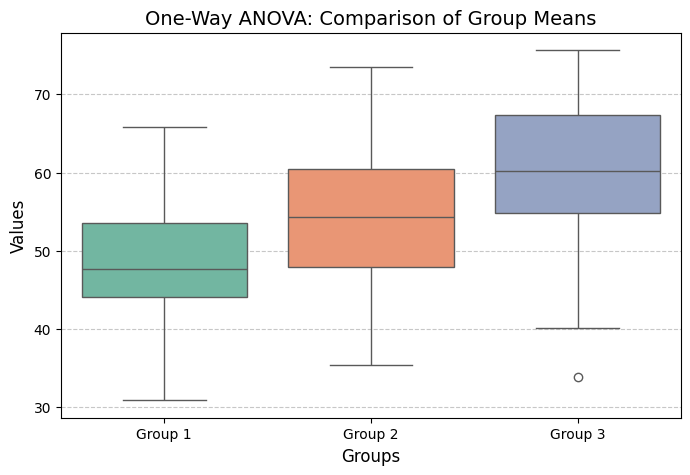

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to perform One-Way ANOVA test
def anova_test_with_plot(*groups, group_labels):
    """
    Performs a one-way ANOVA test and visualizes the group means.

    Parameters:
    - groups: Multiple NumPy arrays representing different groups.
    - group_labels: List of group names.

    Returns:
    - F-statistic and p-value
    """
    # Perform ANOVA test
    F_stat, p_value = stats.f_oneway(*groups)

    print(f"F-Statistic: {F_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("\nReject the null hypothesis (H0). At least one group mean is significantly different.")
    else:
        print("\nFail to reject the null hypothesis (H0). No significant difference between group means.")

    # Prepare data for visualization
    df = pd.DataFrame({group_labels[i]: groups[i] for i in range(len(groups))})
    df_melted = df.melt(var_name="Group", value_name="Value")

    # Plot boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Group", y="Value", data=df_melted, palette="Set2")

    # Add title and labels
    plt.title("One-Way ANOVA: Comparison of Group Means", fontsize=14)
    plt.xlabel("Groups", fontsize=12)
    plt.ylabel("Values", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()

# Generate three random sample groups
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10
group2 = np.random.normal(loc=55, scale=10, size=30)  # Mean=55, Std=10
group3 = np.random.normal(loc=60, scale=10, size=30)  # Mean=60, Std=10

# Perform ANOVA test with visualization
anova_test_with_plot(group1, group2, group3, group_labels=["Group 1", "Group 2", "Group 3"])


Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVAD


=== Checking Assumptions for ANOVA ===

--- Normality Test (Shapiro-Wilk) ---
Group 1: W-stat=0.9751, p-value=0.6868
  ✅ Data in Group 1 appears normally distributed.
Group 2: W-stat=0.9837, p-value=0.9130
  ✅ Data in Group 2 appears normally distributed.
Group 3: W-stat=0.9628, p-value=0.3654
  ✅ Data in Group 3 appears normally distributed.

--- Homogeneity of Variance Test (Levene) ---
Levene's Test: W-stat=0.1480, p-value=0.8627
  ✅ Variances are equal (homogeneity holds).

--- Visual Checks ---


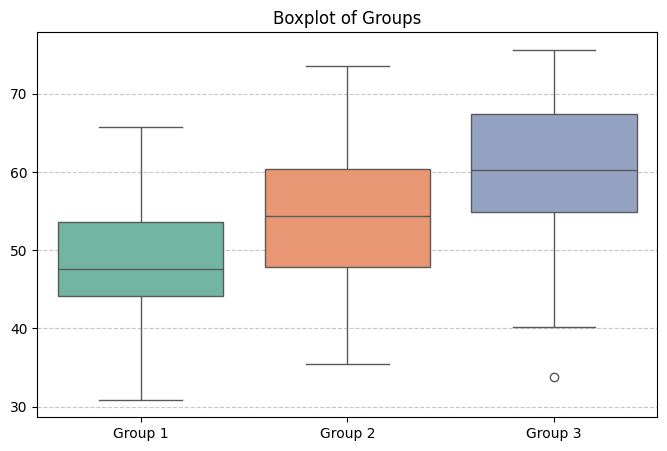

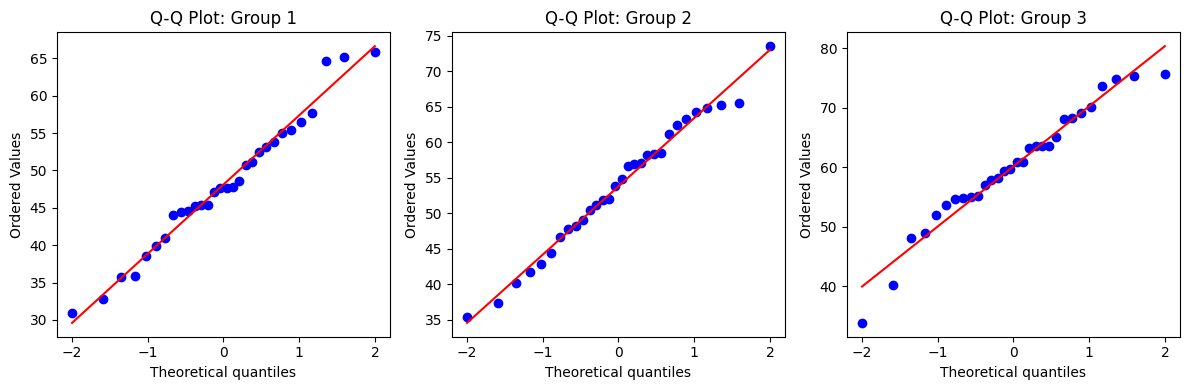

In [7]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

def check_anova_assumptions(*groups, group_labels):
    """
    Checks ANOVA assumptions: normality, independence (via visualization), and homogeneity of variance.

    Parameters:
    - groups: Multiple NumPy arrays representing different groups.
    - group_labels: List of group names.

    Returns:
    - Prints normality and variance test results and visualizes data.
    """

    print("\n=== Checking Assumptions for ANOVA ===")

    # 1. Check Normality (Shapiro-Wilk Test)
    print("\n--- Normality Test (Shapiro-Wilk) ---")
    for i, group in enumerate(groups):
        stat, p = stats.shapiro(group)
        print(f"{group_labels[i]}: W-stat={stat:.4f}, p-value={p:.4f}")
        if p < 0.05:
            print(f"  ❌ Data in {group_labels[i]} is NOT normally distributed.")
        else:
            print(f"  ✅ Data in {group_labels[i]} appears normally distributed.")

    # 2. Check Homogeneity of Variance (Levene’s Test)
    print("\n--- Homogeneity of Variance Test (Levene) ---")
    stat, p = stats.levene(*groups)
    print(f"Levene's Test: W-stat={stat:.4f}, p-value={p:.4f}")
    if p < 0.05:
        print("  ❌ Variances are significantly different (violates homogeneity).")
    else:
        print("  ✅ Variances are equal (homogeneity holds).")

    # 3. Visual Check (Boxplot and Q-Q Plot)
    print("\n--- Visual Checks ---")

    # Boxplot for variance visualization
    data_labels = [group_labels[i] for i in range(len(groups))]
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=groups, palette="Set2")
    plt.xticks(ticks=range(len(group_labels)), labels=group_labels)
    plt.title("Boxplot of Groups")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Q-Q Plots for Normality Check
    fig, axes = plt.subplots(1, len(groups), figsize=(12, 4))
    for i, group in enumerate(groups):
        stats.probplot(group, dist="norm", plot=axes[i])
        axes[i].set_title(f"Q-Q Plot: {group_labels[i]}")
    plt.tight_layout()
    plt.show()

# Generate random sample groups
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10
group2 = np.random.normal(loc=55, scale=10, size=30)  # Mean=55, Std=10
group3 = np.random.normal(loc=60, scale=10, size=30)  # Mean=60, Std=10

# Run assumption checks
check_anova_assumptions(group1, group2, group3, group_labels=["Group 1", "Group 2", "Group 3"])


Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the
results

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Generate sample data
np.random.seed(42)

# Create categorical factors
factor_A = np.repeat(['Low', 'Medium', 'High'], 20)  # Factor A (3 levels)
factor_B = np.tile(['Type 1', 'Type 2'], 30)  # Factor B (2 levels)

# Generate dependent variable (e.g., test scores) with some random variation
data_values = (np.random.normal(50, 10, 20).tolist() +  # Low, Type 1
               np.random.normal(55, 10, 20).tolist() +  # Medium, Type 1
               np.random.normal(60, 10, 20).tolist() +  # High, Type 1
               np.random.normal(52, 10, 20).tolist() +  # Low, Type 2
               np.random.normal(57, 10, 20).tolist() +  # Medium, Type 2
               np.random.normal(62, 10, 20).tolist())   # High, Type 2

# Create DataFrame
df = pd.DataFrame({'Factor_A': factor_A, 'Factor_B': factor_B, 'Value': data_values})

# Perform Two-Way ANOVA
model = ols('Value ~ C(Factor_A) + C(Factor_B) + C(Factor_A):C(Factor_B)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA
print("\n=== Two-Way ANOVA Results ===\n")
print(anova_table)

# Interpretation
alpha = 0.05
for factor in ['C(Factor_A)', 'C(Factor_B)', 'C(Factor_A):C(Factor_B)']:
    p_value = anova_table.loc[factor, 'PR(>F)']
    if p_value < alpha:
        print(f"\n✅ {factor} has a significant effect (p = {p_value:.4f})")
    else:
        print(f"\n❌ {factor} has NO significant effect (p = {p_value:.4f})")

# Visualization: Interaction Plot
plt.figure(figsize=(8, 5))
sns.pointplot(x='Factor_A', y='Value', hue='Factor_B', data=df, capsize=0.1, dodge=True, markers=['o', 's'], linestyles=['-', '--'])
plt.title("Two-Way ANOVA Interaction Plot", fontsize=14)
plt.xlabel("Factor A", fontsize=12)
plt.ylabel("Dependent Variable (Value)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Factor B")
plt.show()


ValueError: All arrays must be of the same length

Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing

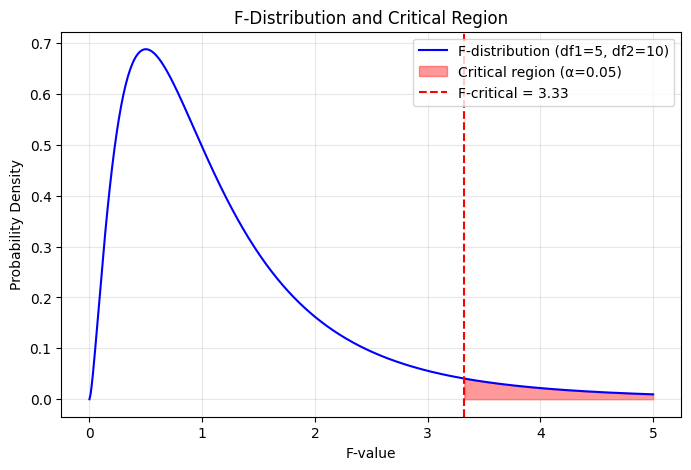

F-critical value (α=0.05): 3.3258


In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_f_distribution(df1, df2, alpha=0.05):
    """
    Plots the F-distribution with given degrees of freedom and highlights the critical region.

    Parameters:
    - df1: Degrees of freedom for the numerator
    - df2: Degrees of freedom for the denominator
    - alpha: Significance level (default: 0.05)
    """

    # Generate F-distribution values
    x = np.linspace(0, 5, 500)  # Range for F-distribution
    y = stats.f.pdf(x, df1, df2)  # Probability density function

    # Find critical value for given alpha
    f_critical = stats.f.ppf(1 - alpha, df1, df2)

    # Plot the F-distribution
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label=f'F-distribution (df1={df1}, df2={df2})', color='blue')

    # Highlight critical region
    x_critical = np.linspace(f_critical, 5, 200)
    y_critical = stats.f.pdf(x_critical, df1, df2)
    plt.fill_between(x_critical, y_critical, color='red', alpha=0.4, label=f'Critical region (α={alpha})')

    # Labels and Title
    plt.axvline(f_critical, color='red', linestyle='dashed', label=f'F-critical = {f_critical:.2f}')
    plt.xlabel("F-value")
    plt.ylabel("Probability Density")
    plt.title("F-Distribution and Critical Region")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Print F-critical value
    print(f"F-critical value (α={alpha}): {f_critical:.4f}")

# Example: Plot F-distribution with df1=5, df2=10
plot_f_distribution(df1=5, df2=10)


Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means


=== One-Way ANOVA Results ===
F-statistic: 12.2095
P-value: 0.0000

✅ Reject H₀: At least one group mean is significantly different.


<ipython-input-10-eae07d5b907e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=df, palette="Set2")


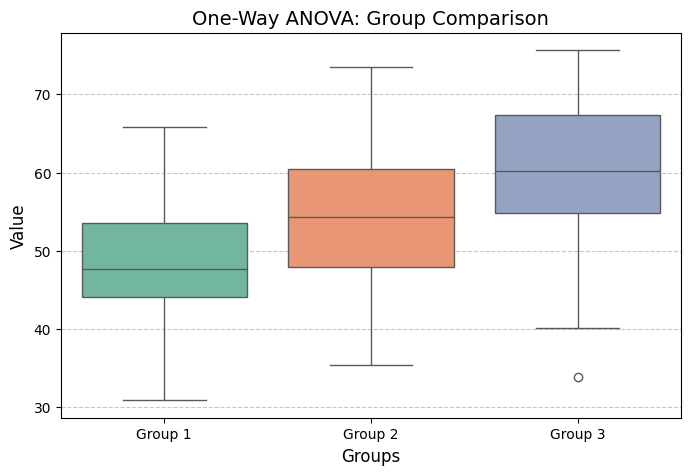

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data for three groups
np.random.seed(42)
group_1 = np.random.normal(50, 10, 30)  # Mean=50, Std=10, Size=30
group_2 = np.random.normal(55, 10, 30)  # Mean=55, Std=10, Size=30
group_3 = np.random.normal(60, 10, 30)  # Mean=60, Std=10, Size=30

# Create DataFrame
df = pd.DataFrame({
    "Value": np.concatenate([group_1, group_2, group_3]),
    "Group": ["Group 1"] * 30 + ["Group 2"] * 30 + ["Group 3"] * 30
})

# Perform One-Way ANOVA
f_statistic, p_value = stats.f_oneway(group_1, group_2, group_3)

# Print ANOVA results
print("\n=== One-Way ANOVA Results ===")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("\n✅ Reject H₀: At least one group mean is significantly different.")
else:
    print("\n❌ Fail to Reject H₀: No significant difference among groups.")

# Visualization: Boxplot to compare group means
plt.figure(figsize=(8, 5))
sns.boxplot(x="Group", y="Value", data=df, palette="Set2")
plt.title("One-Way ANOVA: Group Comparison", fontsize=14)
plt.xlabel("Groups", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means


=== Hypothesis Testing Results ===
T-statistic: -2.3981
P-value: 0.0197

✅ Reject H₀: The means are significantly different.


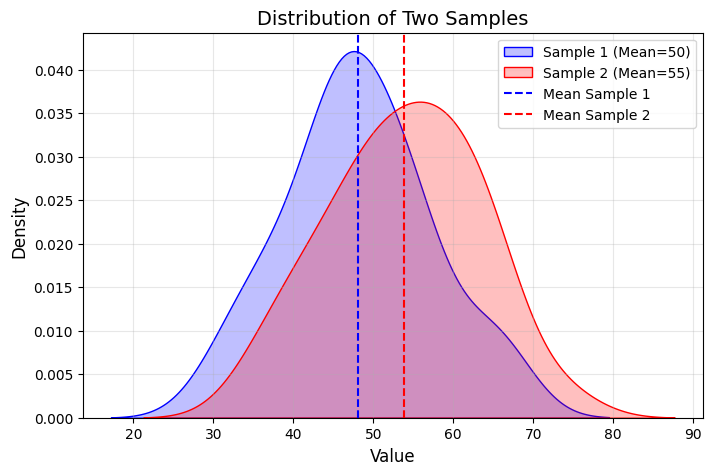

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Simulate Random Data from Normal Distribution
np.random.seed(42)

# Generate two samples from normal distributions
sample_1 = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10, Size=30
sample_2 = np.random.normal(loc=55, scale=10, size=30)  # Mean=55, Std=10, Size=30

# Step 2: Perform Hypothesis Testing (T-test)
t_stat, p_value = stats.ttest_ind(sample_1, sample_2, equal_var=True)

# Print test results
print("\n=== Hypothesis Testing Results ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 3: Interpretation
alpha = 0.05
if p_value < alpha:
    print("\n✅ Reject H₀: The means are significantly different.")
else:
    print("\n❌ Fail to Reject H₀: No significant difference between means.")

# Step 4: Visualization - Distribution of Samples
plt.figure(figsize=(8, 5))
sns.kdeplot(sample_1, fill=True, label="Sample 1 (Mean=50)", color='blue')
sns.kdeplot(sample_2, fill=True, label="Sample 2 (Mean=55)", color='red')
plt.axvline(np.mean(sample_1), color='blue', linestyle="dashed", label="Mean Sample 1")
plt.axvline(np.mean(sample_2), color='red', linestyle="dashed", label="Mean Sample 2")
plt.title("Distribution of Two Samples", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results

In [12]:
import numpy as np
import scipy.stats as stats

# Step 1: Simulate Random Data from Normal Distribution
np.random.seed(42)

# Generate sample data (mean=50, std=10, size=30)
sample_data = np.random.normal(loc=50, scale=10, size=30)

# Step 2: Perform Hypothesis Test for Population Variance using Chi-Square Distribution
n = len(sample_data)  # Sample size
sample_variance = np.var(sample_data, ddof=1)  # Sample variance (ddof=1 for unbiased estimator)
hypothesized_variance = 100  # Hypothesized population variance (std=10, so variance=100)

# Chi-square statistic calculation
chi_square_stat = (n - 1) * sample_variance / hypothesized_variance

# Step 3: Determine the critical value and p-value
alpha = 0.05  # Significance level (5%)
df = n - 1  # Degrees of freedom
chi_square_critical_low = stats.chi2.ppf(alpha / 2, df)
chi_square_critical_high = stats.chi2.ppf(1 - alpha / 2, df)

# P-value calculation (two-tailed)
p_value = 2 * min(stats.chi2.cdf(chi_square_stat, df), 1 - stats.chi2.cdf(chi_square_stat, df))

# Step 4: Print results
print("\n=== Chi-Square Test for Population Variance ===")
print(f"Sample Variance: {sample_variance:.4f}")
print(f"Chi-Square Statistic: {chi_square_stat:.4f}")
print(f"Critical Values: [{chi_square_critical_low:.4f}, {chi_square_critical_high:.4f}]")
print(f"P-value: {p_value:.4f}")

# Step 5: Interpretation
if chi_square_stat < chi_square_critical_low or chi_square_stat > chi_square_critical_high:
    print("\n✅ Reject H₀: The sample variance is significantly different from the population variance.")
else:
    print("\n❌ Fail to Reject H₀: The sample variance is not significantly different from the population variance.")



=== Chi-Square Test for Population Variance ===
Sample Variance: 81.0012
Chi-Square Statistic: 23.4903
Critical Values: [16.0471, 45.7223]
P-value: 0.4927

❌ Fail to Reject H₀: The sample variance is not significantly different from the population variance.


Write a Python script to perform a Z-test for comparing proportions between two datasets or groups


In [13]:
import numpy as np
import scipy.stats as stats

# Step 1: Define the data (Successes and Sample Sizes)
# For example, in Group 1: 40 successes out of 100 trials
# In Group 2: 30 successes out of 100 trials
successes_1 = 40
n_1 = 100
successes_2 = 30
n_2 = 100

# Step 2: Calculate Proportions
p_1 = successes_1 / n_1  # Proportion of successes in Group 1
p_2 = successes_2 / n_2  # Proportion of successes in Group 2

# Step 3: Calculate the Pooled Proportion
P = (successes_1 + successes_2) / (n_1 + n_2)

# Step 4: Compute the Z-Statistic
z_stat = (p_1 - p_2) / np.sqrt(P * (1 - P) * (1/n_1 + 1/n_2))

# Step 5: Compute the p-value for two-tailed test
alpha = 0.05  # Significance level
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed test

# Step 6: Print Results
print("\n=== Z-Test for Proportions ===")
print(f"Proportion of Successes in Group 1: {p_1:.4f}")
print(f"Proportion of Successes in Group 2: {p_2:.4f}")
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 7: Interpretation
if p_value < alpha:
    print("\n✅ Reject H₀: The proportions are significantly different.")
else:
    print("\n❌ Fail to Reject H₀: No significant difference between proportions.")



=== Z-Test for Proportions ===
Proportion of Successes in Group 1: 0.4000
Proportion of Successes in Group 2: 0.3000
Z-Statistic: 1.4825
P-value: 0.1382

❌ Fail to Reject H₀: No significant difference between proportions.


Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results


=== F-Test for Comparing Variances ===
Variance of Group 1: 20.6192
Variance of Group 2: 90.9484
F-statistic: 4.4109
P-value: 0.0000

✅ Reject H₀: The variances are significantly different.


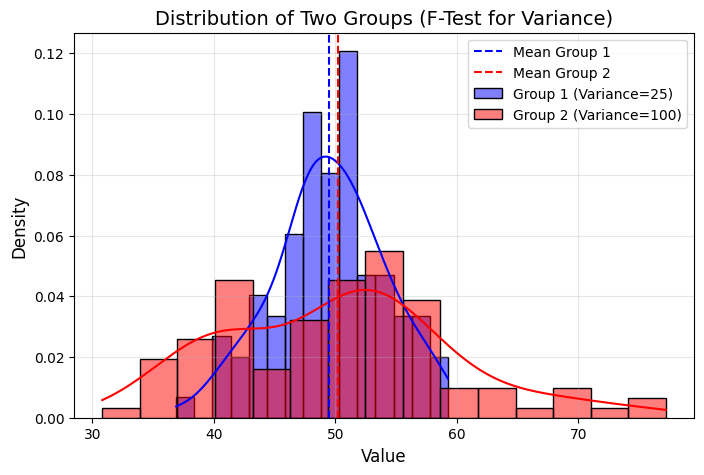

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Two Datasets with Different Variances
np.random.seed(42)

# Group 1: Normal distribution with smaller variance
group_1 = np.random.normal(loc=50, scale=5, size=100)  # Mean=50, Std=5

# Group 2: Normal distribution with larger variance
group_2 = np.random.normal(loc=50, scale=10, size=100)  # Mean=50, Std=10

# Step 2: Calculate the F-statistic
var_1 = np.var(group_1, ddof=1)  # Sample variance for group 1 (ddof=1 for unbiased)
var_2 = np.var(group_2, ddof=1)  # Sample variance for group 2 (ddof=1 for unbiased)

# F-statistic
f_stat = var_1 / var_2 if var_1 > var_2 else var_2 / var_1

# Step 3: Determine the degrees of freedom
df_1 = len(group_1) - 1
df_2 = len(group_2) - 1

# Step 4: Find the p-value from the F-distribution
alpha = 0.05  # Significance level
p_value = 1 - stats.f.cdf(f_stat, df_1, df_2)  # One-tailed test

# Step 5: Print Results
print("\n=== F-Test for Comparing Variances ===")
print(f"Variance of Group 1: {var_1:.4f}")
print(f"Variance of Group 2: {var_2:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 6: Interpretation
if p_value < alpha:
    print("\n✅ Reject H₀: The variances are significantly different.")
else:
    print("\n❌ Fail to Reject H₀: The variances are not significantly different.")

# Step 7: Visualize the distributions of both groups
plt.figure(figsize=(8, 5))
sns.histplot(group_1, color='blue', kde=True, stat="density", label="Group 1 (Variance=25)", bins=15)
sns.histplot(group_2, color='red', kde=True, stat="density", label="Group 2 (Variance=100)", bins=15)
plt.axvline(np.mean(group_1), color='blue', linestyle="dashed", label="Mean Group 1")
plt.axvline(np.mean(group_2), color='red', linestyle="dashed", label="Mean Group 2")
plt.title("Distribution of Two Groups (F-Test for Variance)", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Perform a Chi-square test for goodness of fit with simulated data and analyze the results.


=== Chi-Square Goodness of Fit Test ===
Observed Frequencies: [7, 10, 10, 15, 10, 8]
Expected Frequencies: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
Chi-Square Statistic: 3.8000
P-value: 0.5786

❌ Fail to Reject H₀: The observed data fits the expected distribution.


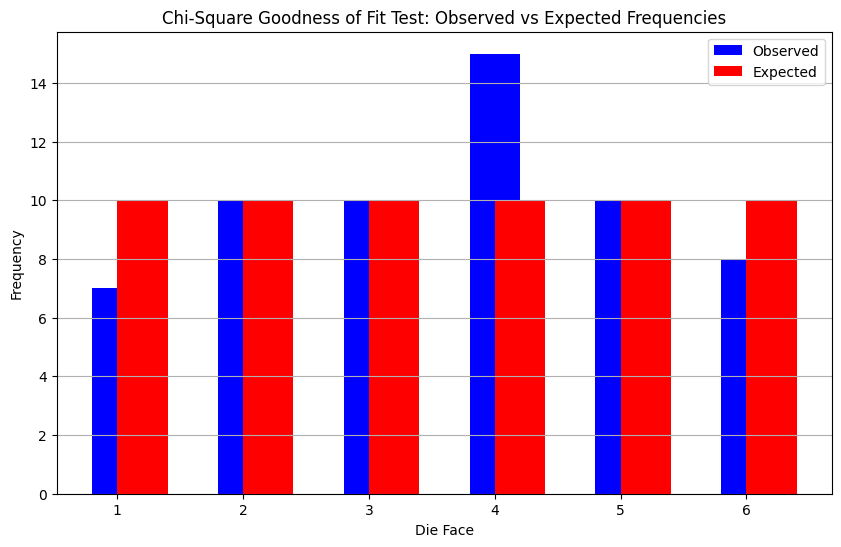

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Simulate Data (60 rolls of a fair die)
np.random.seed(42)
observed_data = np.random.randint(1, 7, 60)  # Simulate 60 die rolls

# Step 2: Calculate the Observed Frequencies
observed_frequencies = [np.sum(observed_data == i) for i in range(1, 7)]

# Step 3: Define Expected Frequencies (for a fair die, each side should appear 10 times)
expected_frequencies = [60 / 6] * 6  # Since we have 6 sides on the die

# Step 4: Perform the Chi-Square Goodness of Fit Test
chi_square_stat, p_value = stats.chisquare(observed_frequencies, expected_frequencies)

# Step 5: Print Results
print("\n=== Chi-Square Goodness of Fit Test ===")
print(f"Observed Frequencies: {observed_frequencies}")
print(f"Expected Frequencies: {expected_frequencies}")
print(f"Chi-Square Statistic: {chi_square_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 6: Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\n✅ Reject H₀: The observed data does not fit the expected distribution.")
else:
    print("\n❌ Fail to Reject H₀: The observed data fits the expected distribution.")

# Step 7: Visualization (Bar plot for observed and expected frequencies)
categories = [1, 2, 3, 4, 5, 6]
plt.figure(figsize=(10, 6))
plt.bar(categories, observed_frequencies, width=0.4, label="Observed", color='blue', align='center')
plt.bar(categories, expected_frequencies, width=0.4, label="Expected", color='red', align='edge')
plt.xlabel("Die Face")
plt.ylabel("Frequency")
plt.title("Chi-Square Goodness of Fit Test: Observed vs Expected Frequencies")
plt.legend()
plt.grid(True, axis='y')
plt.show()
